In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

In [108]:
dt=pd.read_csv('../Datasets/delhipm2.5.csv')
print(dt.tail())
dt.describe()

       Year  F_Month  F_Day  UTC Hour  PM2.5  Month  Day    acq_date
28800  2019       11      8        12   98.8     11    8  08-11-2019
28801  2019       11      8        13   90.2     11    8  08-11-2019
28802  2019       11      8        14  108.6     11    8  08-11-2019
28803  2019       11      8        15  109.0     11    8  08-11-2019
28804  2019       11      8        16  144.7     11    8  08-11-2019


,Year,F_Month,F_Day,UTC Hour,PM2.5,Month,Day
count,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000
mean,2017.447908,6.631002,15.581219,11.491685,106.533446,6.631002,15.581219
std,1.062240,3.262733,8.744167,6.923078,86.011085,3.262733,8.744167
min,2016.000000,1.000000,1.000000,0.000000,4.600000,1.000000,1.000000
25%,2017.000000,4.000000,8.000000,5.000000,49.700000,4.000000,8.000000
50%,2017.000000,7.000000,16.000000,11.000000,79.300000,7.000000,16.000000
75%,2018.000000,9.000000,23.000000,18.000000,136.600000,9.000000,23.000000
max,2019.000000,12.000000,31.000000,23.000000,987.900000,12.000000,31.000000


In [107]:
data=pd.DataFrame()
data=dt[['Year','Month','Day','UTC Hour','acq_date','PM2.5']]
data.head()
data.tail()

,Year,Month,Day,UTC Hour,acq_date,PM2.5
28800,2019,11,8,12,08-11-2019,98.8
28801,2019,11,8,13,08-11-2019,90.2
28802,2019,11,8,14,08-11-2019,108.6
28803,2019,11,8,15,08-11-2019,109.0
28804,2019,11,8,16,08-11-2019,144.7


In [96]:
type(data['acq_date'][0])

str

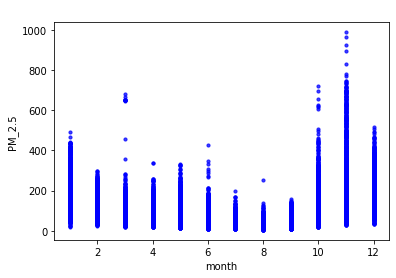

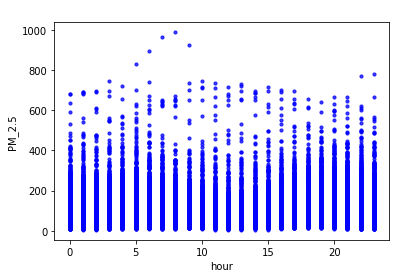

In [97]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Mon=data['Month']
Pm=data['PM2.5']
Hr=data['UTC Hour']    
scatterplot(Mon,Pm,'month','PM_2.5')
scatterplot(Hr,Pm,'hour','PM_2.5')

In [98]:
b=data.groupby('Month').count()
b

,Year,Day,UTC Hour,acq_date,PM2.5
Month,,,,,
1,1940,1940,1940,1940,1940
2,1738,1738,1738,1738,1738
3,2618,2618,2618,2618,2618
4,2112,2112,2112,2112,2112
5,2880,2880,2880,2880,2880
6,2551,2551,2551,2551,2551
7,2741,2741,2741,2741,2741
8,2672,2672,2672,2672,2672
9,2635,2635,2635,2635,2635


In [111]:
Aggregation={'PM2.5':'mean'}
a=pd.DataFrame()
a=data.groupby(['Year','Month','Day', 'acq_date']).agg(Aggregation).reset_index()
a.tail()
#type(a['acq_date'][0])

,Year,Month,Day,acq_date,PM2.5
1262,2019,11,4,04-11-2019,297.742857
1263,2019,11,5,05-11-2019,150.991304
1264,2019,11,6,06-11-2019,110.786957
1265,2019,11,7,07-11-2019,191.000000
1266,2019,11,8,08-11-2019,127.460000


In [100]:
fire_data = pd.read_pickle("fire_data.pkl")

In [101]:
fire_data.head() 

,latitude,longitude,brightness,scan,acq_time,confidence,version,bright_t31,frp,type,Day,Month,Year,acq_date
0,29.7427,76.6679,328.7,2.9,618,68,6.2,311.5,48.2,0.0,1.0,5.0,2017.0,01-05-2017
1,30.4988,74.0669,333.4,1.9,618,77,6.2,312.7,33.6,0.0,1.0,5.0,2017.0,01-05-2017
2,30.2280,75.1271,330.2,2.3,618,73,6.2,315.3,28.3,0.0,1.0,5.0,2017.0,01-05-2017
3,30.5747,75.5177,328.7,2.3,618,73,6.2,312.8,27.4,0.0,1.0,5.0,2017.0,01-05-2017
4,30.4250,75.3941,334.0,2.3,618,80,6.2,313.5,47.6,0.0,1.0,5.0,2017.0,01-05-2017


In [102]:
type(fire_data['acq_date'][0])

str

In [112]:
a

,Year,Month,Day,acq_date,PM2.5
0,2016,3,3,03-03-2016,135.720000
1,2016,3,4,04-03-2016,62.595833
2,2016,3,5,05-03-2016,54.475000
3,2016,3,6,06-03-2016,84.350000
4,2016,3,7,07-03-2016,92.941667
5,2016,3,8,08-03-2016,147.520833
6,2016,3,9,09-03-2016,318.987500
7,2016,3,10,10-03-2016,80.988235
8,2016,3,11,11-03-2016,45.933333
9,2016,3,12,12-03-2016,47.742105


In [113]:
combined = pd.merge(a, fire_data, on="acq_date", how="inner")

In [115]:
combined.describe()

,Year_x,Month_x,Day_x,PM2.5,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,type,Day_y,Month_y,Year_y
count,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,36738.000000,33048.000000,36738.000000,36738.000000,36738.000000
mean,2017.700392,9.166612,15.558631,171.748423,30.401065,75.312399,322.113662,1.368705,775.670151,63.317981,302.790563,17.597607,0.000666,15.558631,9.166612,2017.700392
std,0.644783,2.522713,9.250431,77.624812,0.536344,0.685159,9.807784,0.570540,134.827587,16.086805,6.381222,17.474053,0.036483,9.250431,2.522713,0.644783
min,2017.000000,1.000000,1.000000,15.683333,28.700000,74.000200,300.100000,1.000000,455.000000,0.000000,274.900000,2.400000,0.000000,1.000000,1.000000,2017.000000
25%,2017.000000,9.000000,7.000000,116.241667,30.038900,74.737100,314.800000,1.000000,753.000000,54.000000,299.200000,8.500000,0.000000,7.000000,9.000000,2017.000000
50%,2018.000000,10.000000,15.000000,165.465217,30.416550,75.266450,319.400000,1.100000,812.000000,66.000000,301.200000,13.000000,0.000000,15.000000,10.000000,2018.000000
75%,2018.000000,11.000000,24.000000,215.483333,30.788375,75.840400,328.700000,1.500000,824.000000,75.000000,304.400000,20.700000,0.000000,24.000000,11.000000,2018.000000
max,2019.000000,12.000000,31.000000,546.900000,31.499900,76.799900,402.100000,4.800000,2124.000000,100.000000,328.600000,1104.700000,2.000000,31.000000,12.000000,2019.000000


In [116]:
Aggregation={'PM2.5':'mean'}
combined_data=pd.DataFrame()
combined_data=combined.groupby(['Year_x','Month_x','Day_x']).agg(Aggregation).reset_index()
# a["acq_date"] = data["acq_date"]
combined_data.head()
#type(a['acq_date'][0])

,Year_x,Month_x,Day_x,PM2.5
0,2017,5,1,92.170833
1,2017,5,2,133.978261
2,2017,5,3,119.283333
3,2017,5,4,136.308696
4,2017,5,5,159.175000


In [117]:
columns = list(['latitude', 'longitude', 'brightness', 'scan', 'confidence', 'bright_t31', 'frp'])

combined_data[columns] = combined[columns]

In [118]:
combined_data.head()

,Year_x,Month_x,Day_x,PM2.5,latitude,longitude,brightness,scan,confidence,bright_t31,frp
0,2017,5,1,92.170833,29.7427,76.6679,328.7,2.9,68,311.5,48.2
1,2017,5,2,133.978261,30.4988,74.0669,333.4,1.9,77,312.7,33.6
2,2017,5,3,119.283333,30.2280,75.1271,330.2,2.3,73,315.3,28.3
3,2017,5,4,136.308696,30.5747,75.5177,328.7,2.3,73,312.8,27.4
4,2017,5,5,159.175000,30.4250,75.3941,334.0,2.3,80,313.5,47.6


In [119]:
features = list(['Year_x', 'Month_x', 'Day_x', 'latitude', 'longitude', 'brightness', 'scan', 'confidence', 'bright_t31', 'frp'])


In [120]:
feature_set = combined_data[features]


In [121]:
target = combined_data['PM2.5']

In [122]:
target.describe()

count    496.000000
mean     120.135482
std       77.626163
min       15.683333
25%       64.917708
50%       98.187500
75%      160.004613
max      546.900000
Name: PM2.5, dtype: float64

In [123]:
feature_set.head()

,Year_x,Month_x,Day_x,latitude,longitude,brightness,scan,confidence,bright_t31,frp
0,2017,5,1,29.7427,76.6679,328.7,2.9,68,311.5,48.2
1,2017,5,2,30.4988,74.0669,333.4,1.9,77,312.7,33.6
2,2017,5,3,30.2280,75.1271,330.2,2.3,73,315.3,28.3
3,2017,5,4,30.5747,75.5177,328.7,2.3,73,312.8,27.4
4,2017,5,5,30.4250,75.3941,334.0,2.3,80,313.5,47.6


In [124]:
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(feature_set)

In [125]:
sc = StandardScaler()
X_train_std = sc.fit_transform(feature_set)

In [126]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

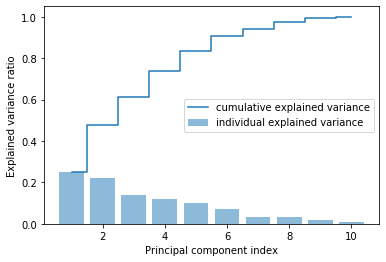

In [127]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,11), var_exp, alpha=0.5,align='center', label='individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [128]:
scaler=StandardScaler()#instantiate
scaler.fit(feature_set) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(feature_set)# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print("after scaling minimum", X_scaled.min(axis=0)) 

after scaling minimum [-1.25358816 -1.69614281 -1.66949656 -2.086683   -1.98575217 -3.6475427
 -0.79384605 -3.96331814 -4.95395672 -0.99541512]


In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

shape of X_pca (496, 4)


In [130]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3
0,2.689907,2.034322,0.728977,1.351622
1,0.423297,-0.382749,2.091385,0.087923
2,1.086758,0.524212,1.151549,0.374658
3,0.879012,0.862490,1.309008,0.300753
4,1.788528,0.208777,1.834246,0.691584


In [131]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

0    0.342485
1    0.303617
2    0.189091
3    0.164807
dtype: float64


In [132]:
target_categorical = []
for value in target:
    if value > 18 and value < 72:
        target_categorical.append(0)
    elif value > 72 and value < 120:
        target_categorical.append(1)
    else:
        target_categorical.append(2)

In [133]:
target_categorical = pd.DataFrame(target_categorical)

In [134]:
target_categorical.head()

,0
0,1
1,2
2,1
3,2
4,2


c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


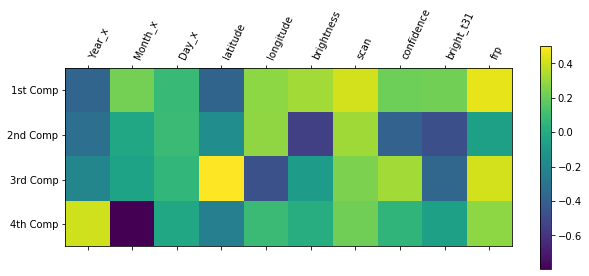

In [135]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2, 3],['1st Comp','2nd Comp','3rd Comp', '4th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(10),features,rotation=65, ha="left")
plt.tight_layout()
plt.show()

In [136]:
target = pd.DataFrame(target)
type(target)


pandas.core.frame.DataFrame

In [137]:
target_cat = target

In [138]:

for i in range(len(target_cat['PM2.5'])):

    if target_cat['PM2.5'].iloc[i] < 150:
        target_cat['PM2.5'].iloc[i] = 0
    elif target_cat['PM2.5'].iloc[i] < 300:
        target_cat['PM2.5'].iloc[i] = 1
    else:
        target_cat['PM2.5'].iloc[i] = 2
        
target_cat

,PM2.5
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,0.0
8,0.0
9,0.0


In [139]:
target_cat.describe()

,PM2.5
count,496.000000
mean,0.310484
std,0.524521
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [140]:
target_norm = sc.fit_transform(target)

In [141]:
target_norm = pd.DataFrame(target_norm)

In [142]:
target_norm.head()

,0
0,-0.592536
1,-0.592536
2,-0.592536
3,-0.592536
4,1.315891


In [143]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, target_norm, test_size=0.2, random_state=0)

In [145]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
y_pred = regressor.predict(X_test)

In [147]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [148]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.315891,0.516939
1,-0.592536,-0.270004
2,-0.592536,-0.018882
3,-0.592536,-0.245719
4,-0.592536,0.178161
5,-0.592536,0.239704
6,-0.592536,0.121810
7,-0.592536,-0.342745
8,1.315891,-0.404478
9,1.315891,0.387225


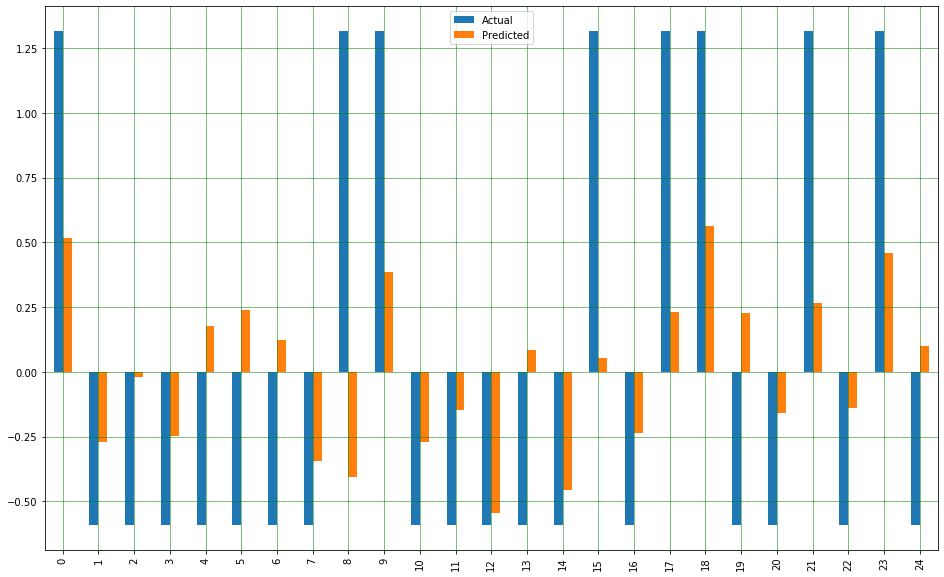

In [159]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [150]:
# plt.scatter(X_test, y_test,  color='gray')
# plt.plot(X_test, y_pred, color='red', linewidth=2)
# plt.show()
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(100, 4)
(100, 1)
(100, 1)


In [151]:
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(X_pca, target_cat, test_size=0.2, random_state=0)

In [152]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
model = clf.fit(X_trainSVM, y_trainSVM) 

c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
print(clf.predict(X_testSVM))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0.]


In [154]:
model.fit(X_trainSVM, y_trainSVM).score(X_trainSVM, y_trainSVM)

c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8611111111111112